# Importing Dependencies

In [1]:
# importing necessary packages for data manipulation
import re 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import urllib 
import requests
import operator
%matplotlib inline
# NLP
from wordcloud import WordCloud, STOPWORDS # filtered out before and after processing natural language
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from PIL import Image
# Feature Importance 
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
# Text Similarity
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Cleaning

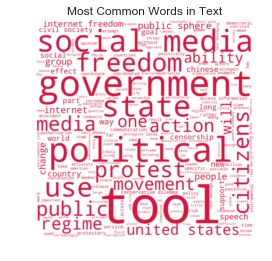

In [2]:
# Feature extraction from long answer for BTG
def cleaning_text(text): # https://www.kaggle.com/rhodiumbeng/classifying-multi-label-comments-0-9741-lb
# utilize re package as a means of substituting informal contractions with separated words
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text
def unique_vocabulary(text):
    vectorizer = CountVectorizer()
    vectorizer.fit_transform(text).todense()
    return vectorizer.vocabulary_
def color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "Crimson"
def wordCloud(text, color = 'white'):
    word = " ".join([word for word in text.split()
                    if "<" not in word and
                     ">" not in word and
                     "-" not in word and
                     "\\" not in word])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color="white",
                      width=1000,
                      height=1000).generate(word)
                     #mask=mask).generate(word)
    plt.imshow(wordcloud.recolor(color_func = color_func), interpolation='bilinear')
    plt.axis('off')
    plt.title("Most Common Words in Text")
    plt.show()
def readFile(path):
    with open(path) as f:
        content = f.read()
    return content
text_expert = readFile("./expert_resistance.txt").lower()
def main():
    wordCloud(text_expert)
if __name__ == "__main__": main()

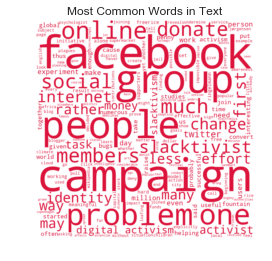

In [3]:
text_non_expert = readFile("./Morozov.txt").lower()
wordCloud(text_non_expert)

In [8]:
# Text of Political Protest and the Public Sphere
textPublicSphere = readFile("./PoliticalPublicSphere.txt").lower()

In [ ]:
wordCloud(textPublicSphere)

In [9]:
# Text of Student Walkouts and Participants on the Margin
textParticipantsMargin = readFile("./ParticipantsOnMargin.txt").lower()

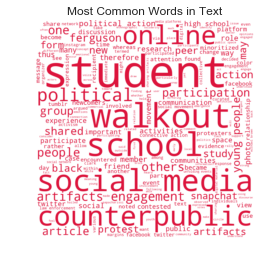

In [10]:
# Word Cloud of Participants on the Margin
wordCloud(textParticipantsMargin)

In [7]:
words_nonexpert = text_non_expert.split()
words_expert = text_expert.split()
non_expert_dict = dict()
for word in words_nonexpert:
    if word.isalpha():
        if not word in non_expert_dict:
            non_expert_dict[word] = words_nonexpert.count(word)
print(sorted(non_expert_dict.items(),key=operator.itemgetter(1))[:10])
    

[('slacktivism', 1), ('evgeny', 1), ('morozov', 1), ('below', 1), ('text', 1), ('talk', 1), ('subject', 1), ('received', 1), ('considerable', 1), ('attention', 1)]
